In [1]:
import time
start_time=time.time()

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from astropy.coordinates import SkyCoord, EarthLocation
from astropy import units as u
from astropy.time import Time

In [4]:
rg="595"
reg='\\595b'

In [5]:
T=7450#K Table 5

https://iopscience.iop.org/article/10.1088/0004-637X/700/1/654

In [6]:
RA=23.390942#J2000
Dec=30.691559#J200

https://ned.ipac.caltech.edu/byname?objname=NGC%20595&hconst=67.8&omegam=0.308&omegav=0.692&wmap=4&corr_z=1

In [7]:
inputfile=dict()
inputfile[0]='Obs\ISIS.595.Blue.txt'

Arm Data

In [8]:
#Ha,[NII],[SII]

#LineN=['H$_{α}$ 6563','[NII]λ6548','[NII]λ6584','[SII]λ6717','[SII]λ6731']
#line=['Ha','Nb','Na','Sb','Sa']
#l=[6562.8,6548,6584,6717,6731]#AngstromsR
#SI=[18,12,12,15,15]#km/s
#XW=[1.00794,14.0067,14.0067,32.065,32.065]
#color=['green','red','red','purple','purple']

#Hb,[OIII]

LineN=['H$_{β}$ 4861','[OIII]λ4959','[OIII]λ5007']
LineM=['Hb4861','OIII4959','OIII5007']
LineD=['Hx','Ox','O']

line=['Hb','Ob','O4']
l=[4861.36,4958.91,5006.84]#AngstromsB
SI=[18,19,19]#km/s
XW=[1.00794,15.9994,15.9994]
color=['purple','blue','blue']

n=len(l)

In [9]:
Data=pd.read_table(inputfile[0])
Data=Data.rename(columns={"Center":"Center.0","ErrC":"ErrC.0","Width":"Width.0","ErrW":"ErrW.0","Peak":"Peak.0","ErrP":"ErrP.0",})

In [10]:
Data

,Pos,X,Y,Slit,Archivo,Center.0,ErrC.0,Width.0,ErrW.0,Peak.0,...,ErrC.2,Width.2,ErrW.2,Peak.2,ErrP.2,Line.2,ErrL.2,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,1.0,214.5600,22.0,1.0,595a1_880-001004.xlsx,4853.837,0.185,0.644,0.374,10.260,...,50.299,176.260,76.337,-2.921,0.7299,-548.000,-348.100,NaN,NaN,NaN
1,2.0,213.1296,22.0,1.0,595a1_880-005008.xlsx,4855.518,0.298,0.287,0.873,-9.238,...,4.219,34.160,8.581,-2.898,0.7155,-105.400,-28.260,NaN,NaN,NaN
2,3.0,211.6992,22.0,1.0,595a1_880-009012.xlsx,4850.115,0.978,-1.573,1.036,3.090,...,1.416,7.574,2.570,-4.309,1.5730,-34.740,-12.440,NaN,NaN,NaN
3,4.0,210.2688,22.0,1.0,595a1_880-013016.xlsx,4514.190,5.551,-282.157,23.988,75.120,...,0.423,1.494,0.762,-5.956,3.1770,-9.471,-5.178,NaN,NaN,NaN
4,5.0,208.8384,22.0,1.0,595a1_880-017020.xlsx,4855.943,0.000,-0.242,0.121,-53.670,...,0.000,0.103,0.000,46700.000,0.0000,5126.000,4659.000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
Data.columns

Index(['Pos', 'X', 'Y', 'Slit', 'Archivo', 'Center.0', 'ErrC.0', 'Width.0',
       'ErrW.0', 'Peak.0', 'ErrP.0', 'Line', 'ErrL', 'Center.1', 'ErrC.1',
       'Width.1', 'ErrW.1', 'Peak.1', 'ErrP.1', 'Line.1', 'ErrL.1', 'Center.2',
       'ErrC.2', 'Width.2', 'ErrW.2', 'Peak.2', 'ErrP.2', 'Line.2', 'ErrL.2',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31'],
      dtype='object')

In [12]:
sz=3
wd=Data.X.max()-Data.X.min()
hd=Data.Y.max()-Data.Y.min()
ar=wd/hd

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


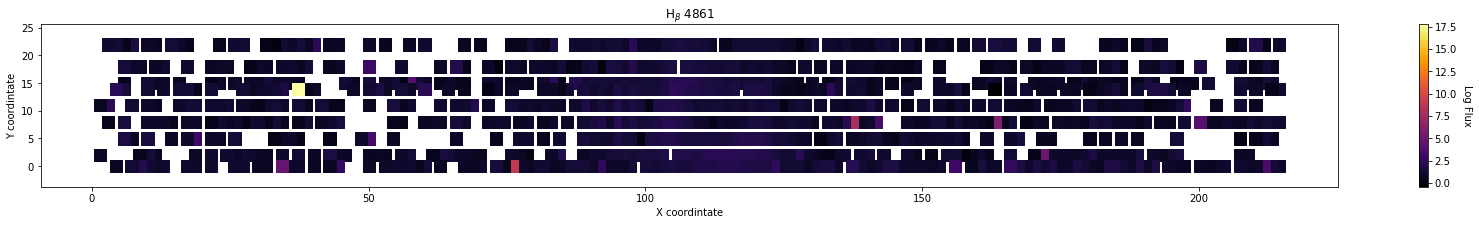

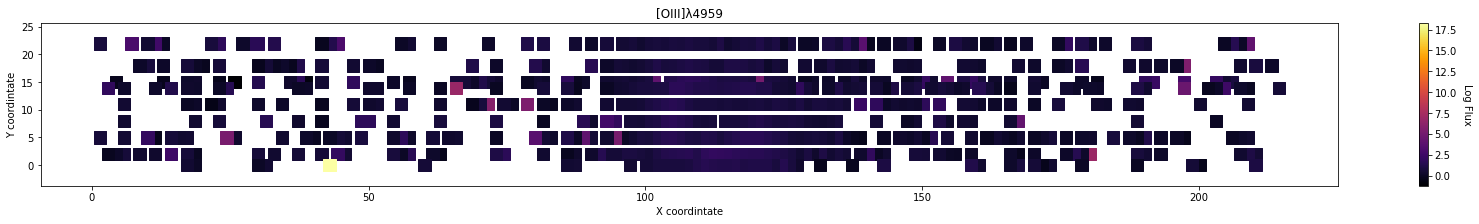

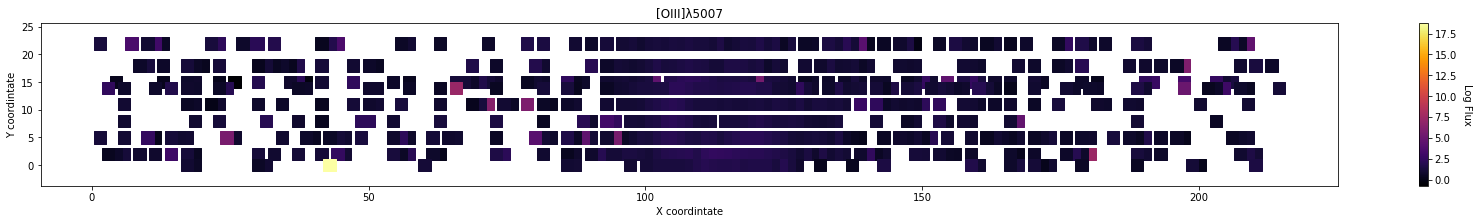

In [13]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    #fig, ax = plt.subplots(figsize=(15, 5))
    plt.scatter(Data.X,Data.Y,c=np.log10(Data['Peak.'+str(i)]), s=150,marker='s',cmap="inferno")
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('Log Flux', rotation=270, labelpad=15)  
    
 #   plt.savefig(rg+reg+'\Imgs\ISIS\ '+LineM[i]+'.png')

Sample A

In [14]:
m01=(Data.X>100)&(Data.X<122)
Data01=Data[m01]

sz=3
wd=Data01.X.max()-Data01.X.min()
hd=Data01.Y.max()-Data01.Y.min()
ar=wd/hd

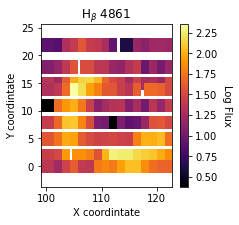

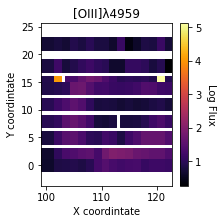

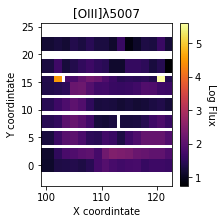

In [15]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    plt.scatter(Data01.X,Data01.Y,c=np.log10(Data01['Peak.'+str(i)]), s=150, marker='s',cmap="inferno")
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('Log Flux', rotation=270, labelpad=15)


Tables individual lines

In [16]:
argo=dict()

for i in range(n):
    data=[Data01['X'],Data01['Y'],Data01['Center.'+str(i)],Data01['Peak.'+str(i)],Data01['Width.'+str(i)]]
    headers=["X","Y","Center","Peak","Width"]

    argo[i]=pd.concat(data,axis=1,keys=headers)
    

RadialVelocity

$$\dfrac{\lambda_{obs}-\lambda}{\lambda}*c + CorrHel $$

In [17]:
orm = EarthLocation.of_site('Roque de los Muchachos')
sc = SkyCoord(ra=RA*u.deg, dec=Dec*u.deg)
heliocorr = sc.radial_velocity_correction('heliocentric', obstime=Time('1992-8-18'), location=orm) 
heliocorr.to(u.km/u.s)

<Quantity 25.90390484 km / s>

In [18]:
#Iraf
corrhelio=np.array(heliocorr.to(u.km/u.s))

#Constant
c=299792.459#km/s

for i in range(n):
    RVo=c*(argo[i].Center-l[i])/l[i]
    RV=RVo+corrhelio

    argo[i]=argo[i].assign(RV=RV.values)

Sigma Disp

$$\sigma_{disp}^{2}=\sigma_{obs}^{2}-\sigma_{therm}^{2}-\sigma_{inst}^{2}$$

$$ \sigma_{obs} = \frac{0.6006}{1.414}* \frac{Width}{\lambda}*c , \sigma_{therm}^{2} = \frac{166.3}{1.414} \frac{T_{e} \times 10^{-4}}{Xw}$$

In [19]:
#Atomic Weights
Hw=1.00794#
Nw=14.0067#
Sw=32.065#
Ow=15.9994#

#SigmaInst
SigmaInstH=18#km/s
SigmaInstN=12#km/s
SigmaInstS=15#km/s
SigmaInstO=19#km/s

#Constant
c=299792.459#km/s

In [20]:
SigmaObs=dict()

for i in range(n):
    #SigmaObs
    a=0.6006/1.414
    SigmaObs[i]=a*(argo[i].Width/l[i])*c
    
    #SigmaTerm
    b=166.6/1.414
    SigmaTerm=np.sqrt(b*(T/10000)/XW[i])

    SigmaDisp=np.sqrt(SigmaObs[i]**2-SigmaTerm**2-SI[i]**2)

    argo[i]=argo[i].assign(Sig=SigmaDisp.values)

    print(SigmaTerm)

9.331975500123068
2.342281466490701
2.342281466490701


C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [21]:
for i in range(n):
    print(argo[i].describe())    

                X           Y       Center          Peak       Width  \
count  144.000000  144.000000   144.000000    144.000000  144.000000   
mean   110.856000   10.555556  4756.544007   -770.824597    0.280708   
std      6.616833    7.018236   696.236864   8167.717644   17.529171   
min    100.128000    0.000000     0.000000 -96890.000000 -195.722000   
25%    105.492000    5.000000  4857.473750     17.267500    0.890750   
50%    110.856000   11.000000  4857.681500     29.890000    0.999000   
75%    116.220000   15.000000  4857.775500     60.582500    1.191250   
max    121.584000   22.000000  4876.841000    228.100000   72.780000   

                  RV          Sig  
count     144.000000   127.000000  
mean    -6437.934260    79.660961  
std     42935.837217   482.163806  
min   -299766.555095     2.913891  
25%      -213.755047    13.691250  
50%      -200.943430    17.719787  
75%      -195.146597    25.324587  
max       980.592934  5126.666754  
                X          

Sample A

In [22]:
 m0=(argo[1].Peak<1000)&(argo[0].RV>-240)&(argo[0].RV<-180)&(argo[1].RV>-260)&(argo[1].RV<-210)  

In [23]:
sz=3
wd=argo[0].X.max()-argo[0].X.min()
hd=argo[0].Y.max()-argo[0].Y.min()
ar=wd/hd

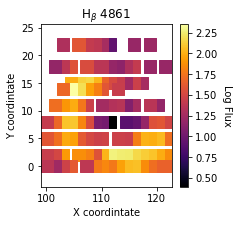

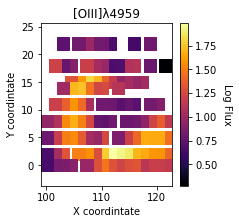

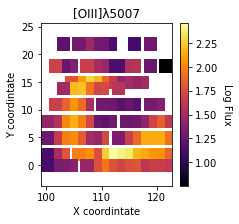

In [24]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    plt.scatter(argo[i][m0].X,argo[i][m0].Y,c=np.log10(argo[i][m0].Peak), s=150, marker='s',cmap="inferno")
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('Log Flux', rotation=270, labelpad=15)
    
 #   plt.savefig(rg+reg+'\Imgs\A\F'+LineM[i]+'.png')

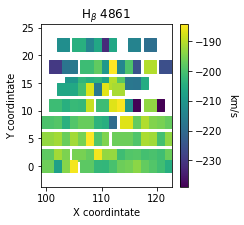

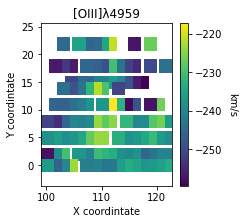

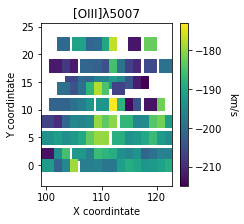

In [25]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    plt.scatter(argo[i][m0].X,argo[i][m0].Y,c=argo[i][m0].RV, s=150, marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('km/s', rotation=270, labelpad=15)
    
  #  plt.savefig(rg+reg+'\Imgs\A\RV'+LineM[i]+'.png')

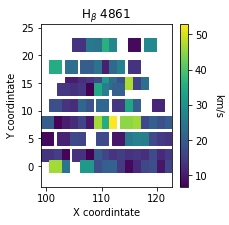

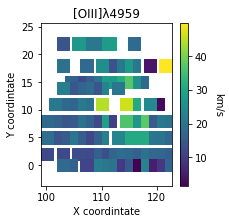

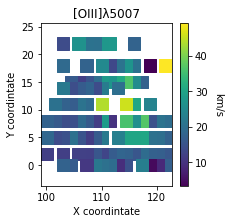

In [26]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    plt.scatter(argo[i][m0].X,argo[i][m0].Y,c=argo[i][m0].Sig, s=150, marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('km/s', rotation=270, labelpad=15)
    
 #   plt.savefig(rg+reg+'\Imgs\A\S'+LineM[i]+'.png')

In [27]:
for i in range(n):
    print(argo[i][m0].describe())   

                X           Y       Center        Peak       Width  \
count  109.000000  109.000000   109.000000  109.000000  109.000000   
mean   110.626349    9.146789  4857.675936   55.882954    1.013661   
std      6.134560    6.878342     0.178874   45.993792    0.433867   
min    100.128000    0.000000  4857.066000    2.461000   -0.933000   
25%    105.849600    2.000000  4857.623000   23.290000    0.893000   
50%    110.140800    8.000000  4857.712000   37.970000    0.991000   
75%    115.862400   15.000000  4857.782000   80.060000    1.149000   
max    121.584000   22.000000  4857.955000  228.100000    2.166000   

               RV        Sig  
count  109.000000  97.000000  
mean  -201.286567  19.748226  
std     11.030909   9.948994  
min   -238.900351   6.765266  
25%   -204.551034  13.455878  
50%   -199.062543  17.035493  
75%   -194.745753  23.640878  
max   -184.077113  52.989309  
                X           Y       Center        Peak       Width  \
count  109.000000  1

Statistical Filter

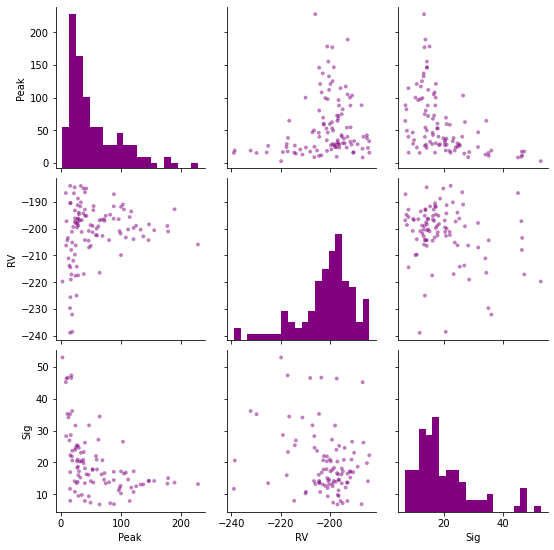

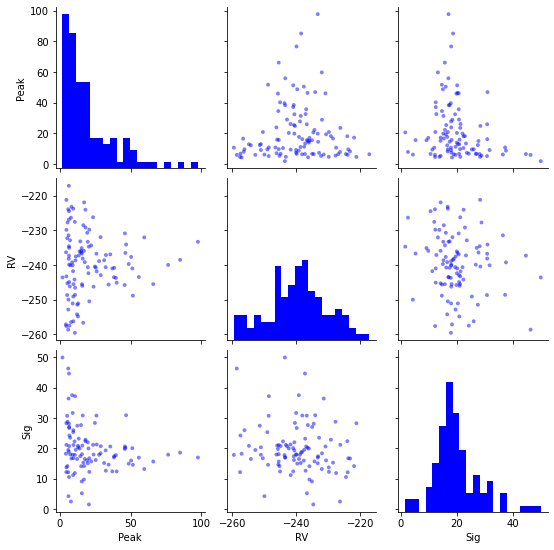

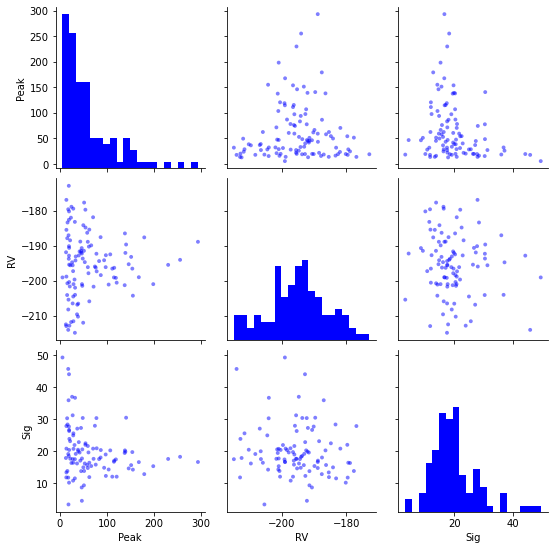

In [28]:
for i in range(n):

    sns.pairplot(argo[i][m0],
                 vars=["Peak", "RV", "Sig"],
                 diag_kind='hist',
                 plot_kws=dict(alpha=0.5, s=15, edgecolor='none',color=color[i]),
                 diag_kws=dict(bins=20,color=color[i]),
                )



Sample B

In [29]:
m=(argo[0].RV>-210)&(argo[0].RV<-180)&(argo[1].RV>-250)&(argo[1].RV<-180)&(argo[0].Peak>15)

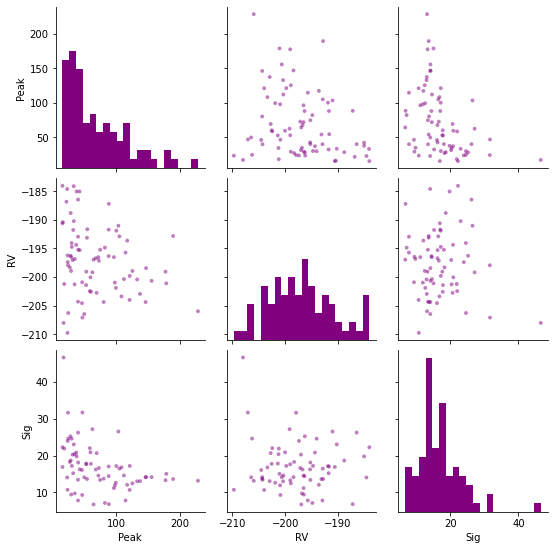

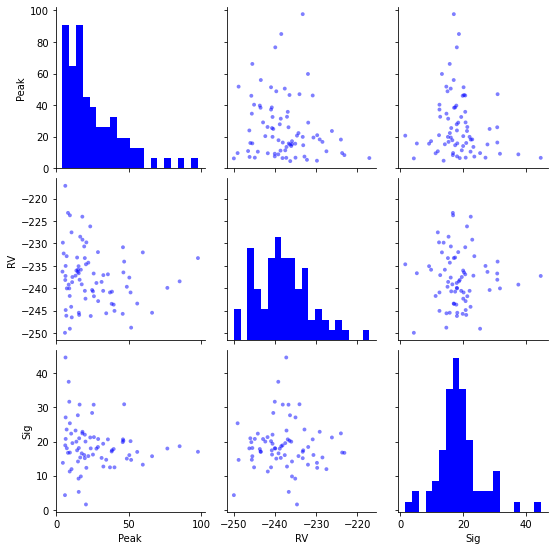

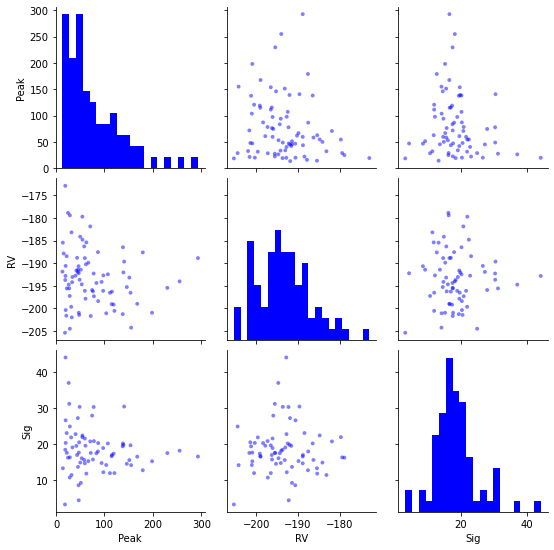

In [30]:
for i in range(n):

    sns.pairplot(argo[i][m],
                 vars=["Peak", "RV", "Sig"],
                 diag_kind='hist',
                 plot_kws=dict(alpha=0.5, s=15, edgecolor='none',color=color[i]),
                 diag_kws=dict(bins=20, color=color[i]),
                )
    
 #   plt.savefig(rg+reg+'\Imgs\Corrl\ '+LineM[i]+'.png')


In [31]:
sz=3
wd=argo[0][m].X.max()-argo[0][m].X.min()
hd=argo[0][m].Y.max()-argo[0][m].Y.min()
ar=wd/hd

<ipython-input-32-82702b3d5487>:3: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(argo[i][m].X,argo[i][m].Y,c=np.log10(argo[i][m]).Peak, s=150, marker='s',cmap="inferno")
<ipython-input-32-82702b3d5487>:3: RuntimeWarning: invalid value encountered in log10
  plt.scatter(argo[i][m].X,argo[i][m].Y,c=np.log10(argo[i][m]).Peak, s=150, marker='s',cmap="inferno")


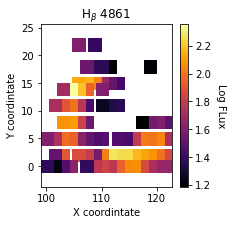

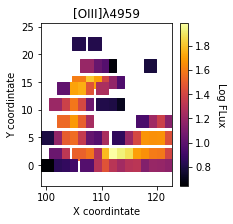

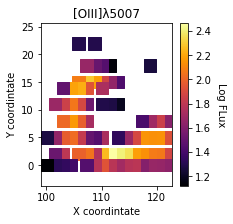

In [32]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    plt.scatter(argo[i][m].X,argo[i][m].Y,c=np.log10(argo[i][m]).Peak, s=150, marker='s',cmap="inferno")
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('Log FLux', rotation=270, labelpad=15)
    
 #   plt.savefig(rg+reg+'\Imgs\B\F'+LineM[i]+'.png')

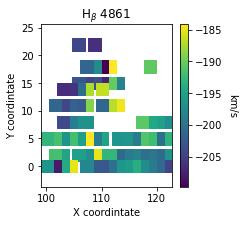

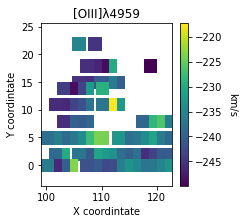

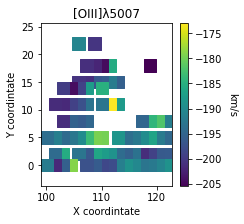

In [33]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    plt.scatter(argo[i][m].X,argo[i][m].Y,c=argo[i][m].RV, s=150, marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('km/s', rotation=270, labelpad=15)
    
 #   plt.savefig(rg+reg+'\Imgs\B\RV'+LineM[i]+'.png')

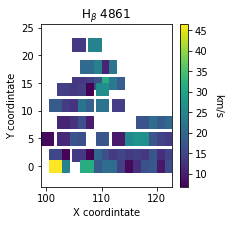

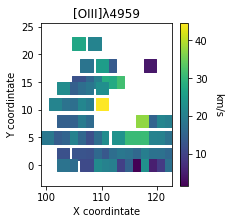

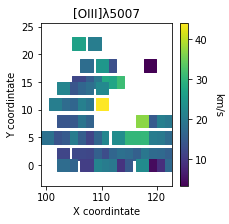

In [34]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    plt.scatter(argo[i][m].X,argo[i][m].Y,c=argo[i][m].Sig, s=150, marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    #cbar.ax.set_yticklabels(['0','1','2','>3'])
    cbar.set_label('km/s', rotation=270, labelpad=15)
    
  #  plt.savefig(rg+reg+'\Imgs\B\S'+LineM[i]+'.png')

In [35]:
for i in range(n):
    print(argo[i][m].describe())  

                X          Y       Center        Peak      Width          RV  \
count   78.000000  78.000000    78.000000   78.000000  78.000000   78.000000   
mean   110.415877   7.038462  4857.745333   68.727308   0.947051 -197.006928   
std      6.103852   6.205239     0.098156   47.355281   0.359234    6.053131   
min    100.128000   0.000000  4857.539000   15.380000  -0.933000 -209.731182   
25%    105.849600   2.000000  4857.677500   31.555000   0.898750 -201.190104   
50%    110.140800   5.000000  4857.745500   53.360000   0.959000 -196.996650   
75%    115.504800  11.000000  4857.810250   98.822500   1.073750 -193.003619   
max    121.584000  22.000000  4857.955000  228.100000   1.938000 -184.077113   

             Sig  
count  71.000000  
mean   16.953829  
std     6.579547  
min     6.765266  
25%    13.241386  
50%    16.209131  
75%    20.306025  
max    46.538798  
                X          Y       Center       Peak      Width          RV  \
count   78.000000  78.000000 

 $\sigma_{disp}$ vs I (a.k.a. Peak)

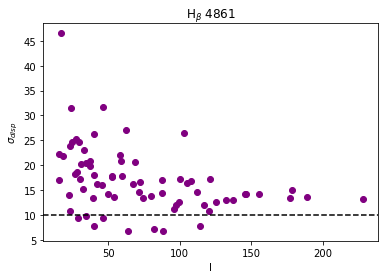

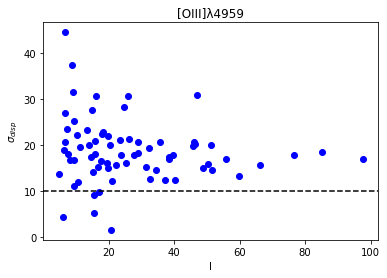

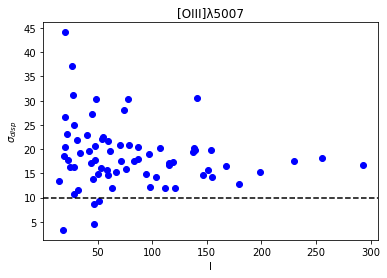

In [36]:
for i in range(n):
    fig, ax = plt.subplots()
    plt.scatter(argo[i][m].Peak,argo[i][m].Sig,color=color[i])
    plt.title(LineN[i])
    plt.axhline(y=10, color='k', linestyle='--')
    ax.set_xlabel('I')
    ax.set_ylabel('$σ_{disp}$')
  
    
 #   plt.savefig(rg+reg+'\Imgs\SvsI\SI'+LineM[i]+'.png')

Ratios

In [37]:

sz=3
wd=argo[0].X.max()-argo[0].X.min()
hd=argo[0].Y.max()-argo[0].Y.min()
ar=wd/hd

[OIII]/Hb Ratio

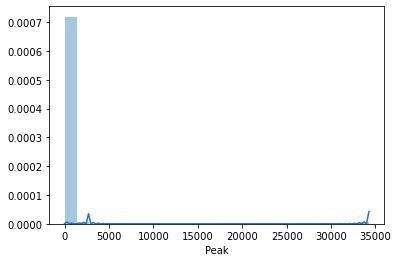

In [38]:
OHRatio=(argo[1].Peak+argo[2].Peak)/argo[0].Peak
sns.distplot(OHRatio,bins=25)

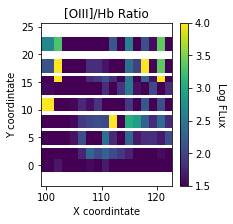

In [39]:
fig, ax = plt.subplots(figsize=(sz*ar,sz))
#plt.scatter(argo[0][m04].X,argo[0][m04].Y,c=SHRatio[m04], s=150, marker='s')
plt.scatter(argo[0].X,argo[0].Y,c=OHRatio, s=150, marker='s')
#plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
plt.axis('equal')
plt.title('[OIII]/Hb Ratio')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
    
cbar = plt.colorbar()
cbar.set_label('Log FLux', rotation=270, labelpad=15)
plt.clim(1.5,4)

#plt.savefig(rg+reg+'\Imgs\RD\OR'+LineM[i]+'.png')

Export Samples for statistical analysis

In [40]:
#for i in range(n):
#    argo[i][m0].to_csv(rg+reg+'\Data\ISIS\A\ '+LineM[i]+'.csv')

In [41]:
for i in range(n):
    argo[i][m0].to_csv('Res//'+rg+'I'+LineD[i]+'B.csv')

In [42]:
#for i in range(n):
#    argo[i][m].to_csv(rg+reg+'\Data\ISIS\B\ '+LineM[i]+'.csv')

In [43]:
for i in range(n):
    argo[i][m].to_csv('Res//'+rg+'I'+LineD[i]+'C.csv')

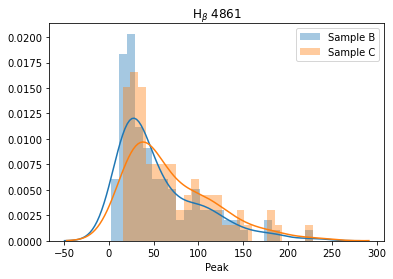

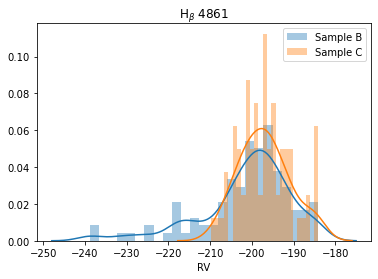

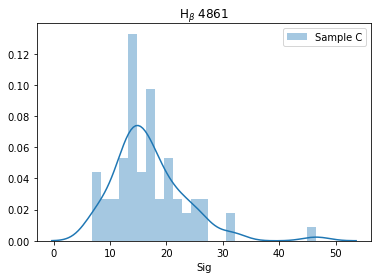

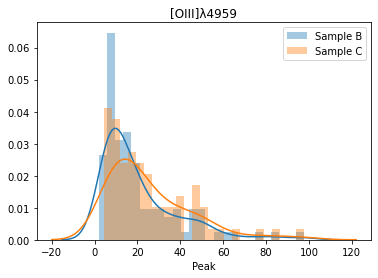

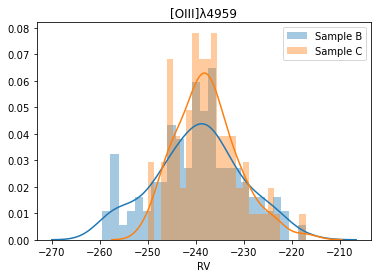

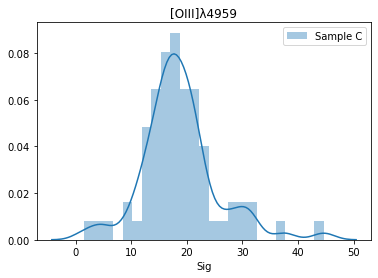

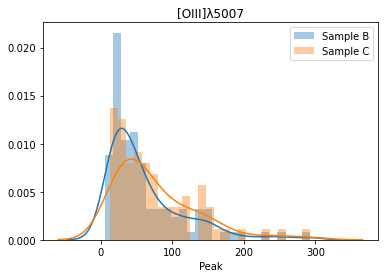

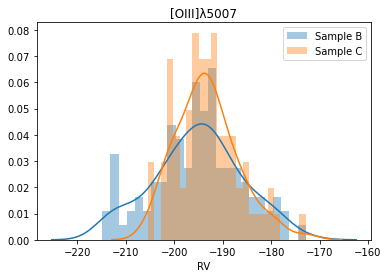

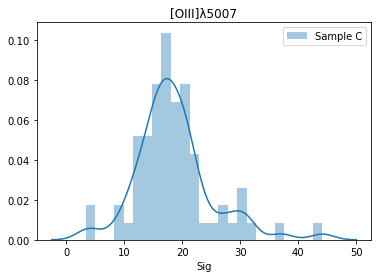

In [44]:
for i in range(n):

    fig, ax = plt.subplots()

    sns.distplot(argo[i][m0].Peak,bins=25,label='Sample B')
    sns.distplot(argo[i][m].Peak,bins=25,label='Sample C')
    plt.legend()
    plt.title(LineN[i])
 #   plt.savefig(rg+reg+'\Imgs\Hist\F'+LineM[i]+'.png')

    fig, ax = plt.subplots()
    sns.distplot(argo[i][m0].RV,bins=25,label='Sample B')
    sns.distplot(argo[i][m].RV,bins=25,label='Sample C')
    plt.legend()
    plt.title(LineN[i])
  #  plt.savefig(rg+reg+'\Imgs\Hist\RV'+LineM[i]+'.png')

    fig, ax = plt.subplots()
    #sns.distplot(argo[i][m0].Sig,bins=25,label='Sample B')
    sns.distplot(argo[i][m].Sig,bins=25,label='Sample C')
    plt.legend()
    plt.title(LineN[i])
 #   plt.savefig(rg+reg+'\Imgs\Hist\S'+LineM[i]+'.png')


In [45]:
argo[2][m0].RV.describe()

count    109.000000
mean    -195.149994
std        9.130514
min     -214.859826
25%     -200.968459
50%     -194.741295
75%     -189.651785
max     -172.886343
Name: RV, dtype: float64

In [46]:
argo[2][m0].RV.sem()

0.8745446765102173

In [47]:
argo[2][m0].nlargest(5, ['Peak'])

,X,Y,Center,Peak,Width,RV,Sig
1122,111.5712,2.0,5003.253,293.0,0.997,-188.873390,16.627151
1121,113.0016,2.0,5003.167,255.1,1.040,-194.022776,18.251522
1120,114.4320,2.0,5003.143,229.8,1.022,-195.459814,17.581540
375,107.2800,15.0,5003.051,198.2,0.964,-200.968459,15.316796
1123,110.1408,2.0,5003.274,179.1,0.906,-187.615982,12.823797


In [48]:
for i in range(n): 
    print(argo[i][m0].nlargest(5, ['Peak']).describe())

                X          Y       Center        Peak     Width          RV  \
count    5.000000   5.000000     5.000000    5.000000  5.000000    5.000000   
mean   109.854720   6.800000  4857.698000  185.620000  0.564800 -199.925901   
std      4.454955   6.572671     0.076697   26.734753  0.837456    4.729812   
min    104.419200   2.000000  4857.600000  155.300000 -0.933000 -205.969408   
25%    105.849600   2.000000  4857.679000  177.200000  0.923000 -201.097601   
50%    111.571200   2.000000  4857.686000  178.400000  0.926000 -200.665922   
75%    113.001600  14.000000  4857.712000  189.100000  0.944000 -199.062543   
max    114.432000  14.000000  4857.813000  228.100000  0.964000 -192.834031   

             Sig  
count   5.000000  
mean   13.866364  
std     0.762536  
min    13.169530  
25%    13.313242  
50%    13.644444  
75%    14.154048  
max    15.050558  
                X          Y       Center       Peak     Width          RV  \
count    5.000000   5.000000     5.0000

In [49]:
for i in range(n): 
    print(argo[i][m0].nlargest(5, ['Peak']).sem())

X          1.992317
Y          2.939388
Center     0.034300
Peak      11.956145
Width      0.374522
RV         2.115236
Sig        0.341017
dtype: float64
X         1.230477
Y         2.600000
Center    0.040197
Peak      6.746602
Width     0.023682
RV        2.430093
Sig       0.955478
dtype: float64
X          1.230477
Y          2.600000
Center     0.040197
Peak      20.243137
Width      0.023682
RV         2.406830
Sig        0.960385
dtype: float64


In [50]:
for i in range(n): 
    print(argo[i][m0].loc[argo[i][m0].Peak == argo[i][m0].Peak.max()])

            X     Y  Center   Peak  Width          RV       Sig
527  104.4192  14.0  4857.6  228.1  0.923 -205.969408  13.16953
             X    Y    Center   Peak  Width          RV        Sig
1122  111.5712  2.0  4954.623  97.66  0.997 -233.268024  16.998557
             X    Y    Center   Peak  Width         RV        Sig
1122  111.5712  2.0  5003.253  293.0  0.997 -188.87339  16.627151


In [51]:
argo[2][m].nlargest(5, ['Peak'])

,X,Y,Center,Peak,Width,RV,Sig
1122,111.5712,2.0,5003.253,293.0,0.997,-188.873390,16.627151
1121,113.0016,2.0,5003.167,255.1,1.040,-194.022776,18.251522
1120,114.4320,2.0,5003.143,229.8,1.022,-195.459814,17.581540
375,107.2800,15.0,5003.051,198.2,0.964,-200.968459,15.316796
1123,110.1408,2.0,5003.274,179.1,0.906,-187.615982,12.823797


In [52]:
Data.iloc[375]

Pos                               76
X                             107.28
Y                                 15
Slit                               3
Archivo        595a3_884-301304.xlsx
Center.0                     4857.63
ErrC.0                         0.019
Width.0                        0.944
ErrW.0                         0.047
Peak.0                         145.9
ErrP.0                         6.054
Line                           146.6
ErrL                           6.109
Center.1                     4954.42
ErrC.1                         0.013
Width.1                        0.964
ErrW.1                         0.033
Peak.1                         66.08
ErrP.1                          1.89
Line.1                         67.83
ErrL.1                         1.953
Center.2                     5003.05
ErrC.2                         0.013
Width.2                        0.964
ErrW.2                         0.033
Peak.2                         198.2
ErrP.2                         5.669
L

In [53]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 45.163166999816895 seconds ---
